In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [ ]:
dataset_name = 'malaria'
builder = tfds.builder(dataset_name)
builder.download_and_prepare()

In [ ]:
dataset = builder.as_dataset()
train_dataset = dataset['train']

In [ ]:
dataset

In [ ]:
for data in dataset['train'].take(1):
  print(data)

In [ ]:
def splits(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
  DATASET_SIZE = len(dataset)

  train_dataset = dataset.take(int(TRAIN_RATIO*DATASET_SIZE))

  val_test_dataset = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))
  val_dataset = val_test_dataset.take(int(VAL_RATIO*DATASET_SIZE))

  test_dataset = val_test_dataset.skip(int(VAL_RATIO*DATASET_SIZE))
  return train_dataset, val_dataset, test_dataset

In [ ]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

train_dataset, val_dataset, test_dataset = splits(dataset['train'], TRAIN_RATIO, VAL_RATIO, TEST_RATIO )

In [ ]:
train_dataset

# Data Visualization

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
def select_image():
    root = Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename(title="Select an Image",
                                           filetypes=[("Image files", "*.jpg *.jpeg *.png *.bmp *.tiff")])
    if not file_path:
        raise ValueError("No file selected!")
    return file_path
# Load the malaria dataset
dataset_name = 'malaria'
builder = tfds.builder(dataset_name)
builder.download_and_prepare()

# Load the dataset with labels
dataset = builder.as_dataset(split='train')

# Visualize some images
plt.figure(figsize=(10, 10))
for example in dataset.take(9):  # Take first 9 examples
    image = example['image']
    label = example['label']

    plt.subplot(3, 3, label.numpy() + 1)
    plt.imshow(image.numpy())
    plt.title(f'Label: {label.numpy()}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tkinter import Tk, filedialog
def select_image():
    root = Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename(title="Select an Image",
                                           filetypes=[("Image files", "*.jpg *.jpeg *.png *.bmp *.tiff")])
    if not file_path:
        raise ValueError("No file selected!")
    return file_path
def load_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"Error: The file {image_path} does not exist or is not an image.")
    return img
    
def increase_intensity(image, value, threshold=None):
    # Create a copy of the image to avoid modifying the original
    modified_image = image.copy()
    
    if threshold is not None:
        # Increase intensity of pixels above the threshold
        modified_image[image > threshold] = np.clip(image[image > threshold] + value, 0, 255)
    else:
        # Increase intensity of all pixels
        modified_image = np.clip(image + value, 0, 255)
    
    return modified_image
    
def enhance_darker_shades(image, value, threshold=None):
    # Create a copy of the image to avoid modifying the original
    modified_image = image.copy()
    
    if threshold is not None:
        # Increase intensity of pixels below the threshold (darker shades)
        modified_image[image < threshold] = np.clip(image[image < threshold] + value, 0, 255)
    
    return modified_image

def display_image(img, title='Image', cmap='gray'):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()
    
def canny_edge_detection(image):
    # Load image
    img = image
    
    # Apply Gaussian Blur to smooth the image
    blurred_img = cv2.GaussianBlur(img, (5, 5), 1.4)
    
    # Perform Canny edge detection
    edges = cv2.Canny(blurred_img, 100, 200)
    
    # Display the original and edge-detected images
    display_image(edges, title='Canny Edge Detection')
    kernel = np.ones((5, 5), np.uint8)
    
    # Apply dilation and erosion
    dilated = cv2.dilate(edges, kernel, iterations=1)
    eroded = cv2.erode(dilated, kernel, iterations=1)
    
    return eroded
# Example usage
#image_path = 'C37BP2_thinF_IMG_20150620_133111a_cell_86.png'
#original_image = load_image(image_path)

image_path = select_image()
original_image = load_image(image_path)

# Enhance darker shades by increasing intensity of pixels below a certain threshold by 50
threshold = 1# Example threshold for darker shades
#threshold1 = 100

#increased_intensity_image_threshold = increase_intensity(original_image, value=50, threshold=threshold1)
increased_intensity_darker_shades = enhance_darker_shades(original_image , value=50, threshold=threshold)


# Display original and modified images
display_image(original_image, title='Original Image')
#display_image(increased_intensity_image_threshold, title=f'Increased Intensity (Pixels > {threshold})')
display_image(increased_intensity_darker_shades, title=f'Enhanced Darker Shades (Pixels < {threshold})')

morphed_image =canny_edge_detection(increased_intensity_darker_shades)
display_image(morphed_image, title='Morphological Operations')

In [2]:
import cv2
import numpy as np
from IPython.display import Image, display
from matplotlib import pyplot as plt

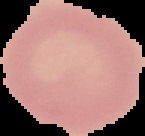

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tkinter import Tk, filedialog
# Plot the image
def imshow(img, ax=None):
	if ax is None:
		ret, encoded = cv2.imencode(".jpg", img)
		display(Image(encoded))
	else:
		ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
		ax.axis('off')
def select_image():
    root = Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename(title="Select an Image",
                                           filetypes=[("Image files", "*.jpg *.jpeg *.png *.bmp *.tiff")])
    if not file_path:
        raise ValueError("No file selected!")
    return file_path
#Image loading
image_path = select_image()
#img = load_image(image_path)
img = cv2.imread(image_path)
#img = cv2.imread("C33P1thinF_IMG_20150619_115740a_cell_162.png")
# Show image
imshow(img)


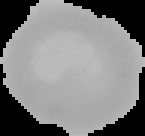

In [39]:
#image grayscale conversion
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow(gray)


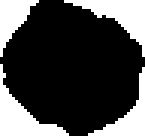

In [40]:
#Threshold Processing
ret, bin_img = cv2.threshold(gray,
							0, 255, 
							cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
imshow(bin_img)

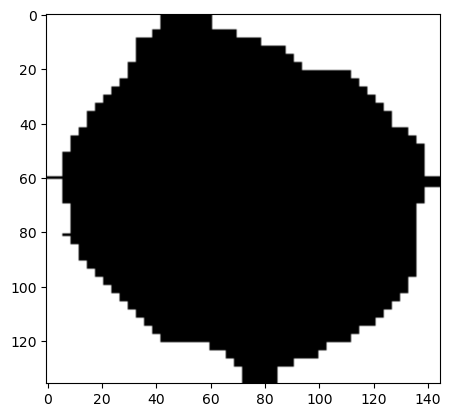

In [41]:
# sure background area
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
sure_bg = cv2.dilate(bin_img, kernel, iterations=3)
plt.imshow(sure_bg, cmap='gray')

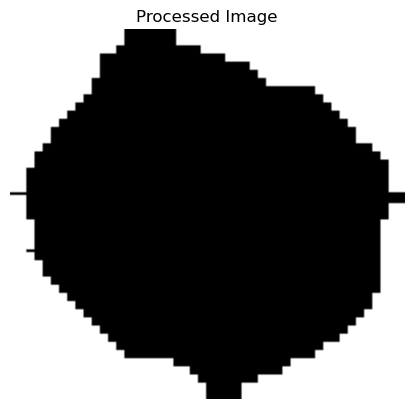

In [42]:
des = cv2.bitwise_not(sure_bg)

# Find contours
contours, hierarchy = cv2.findContours(des, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the inverted image
for cnt in contours:
    cv2.drawContours(des, [cnt], 0, 255, -1)

# Invert the image back to the original state
gray = cv2.bitwise_not(des)

# Save or display the result
plt.imshow(gray, cmap='gray')
plt.title('Processed Image')
plt.axis('off')  # Hide axes
plt.show()



In [43]:
# Read the images
image1 = gray
image2 = sure_bg

# Ensure the images have the same size
if image1.shape != image2.shape:
    raise ValueError("Images must have the same dimensions")

# Subtract the images
diff = cv2.absdiff(image1, image2)

# Compute the sum of absolute differences
sad = np.sum(diff)

print(f'Sum of Absolute Differences: {sad}')


Sum of Absolute Differences: 0
